In [1]:
# Multiclass with 1 hidden layer 4 neurons
#activation functions used -> 1. tanh    2.softmax 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
 

In [3]:

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE = 0.2
NOISE = 0.2
EPOCHS = 10000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [4]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [5]:
#visualization
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [8]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

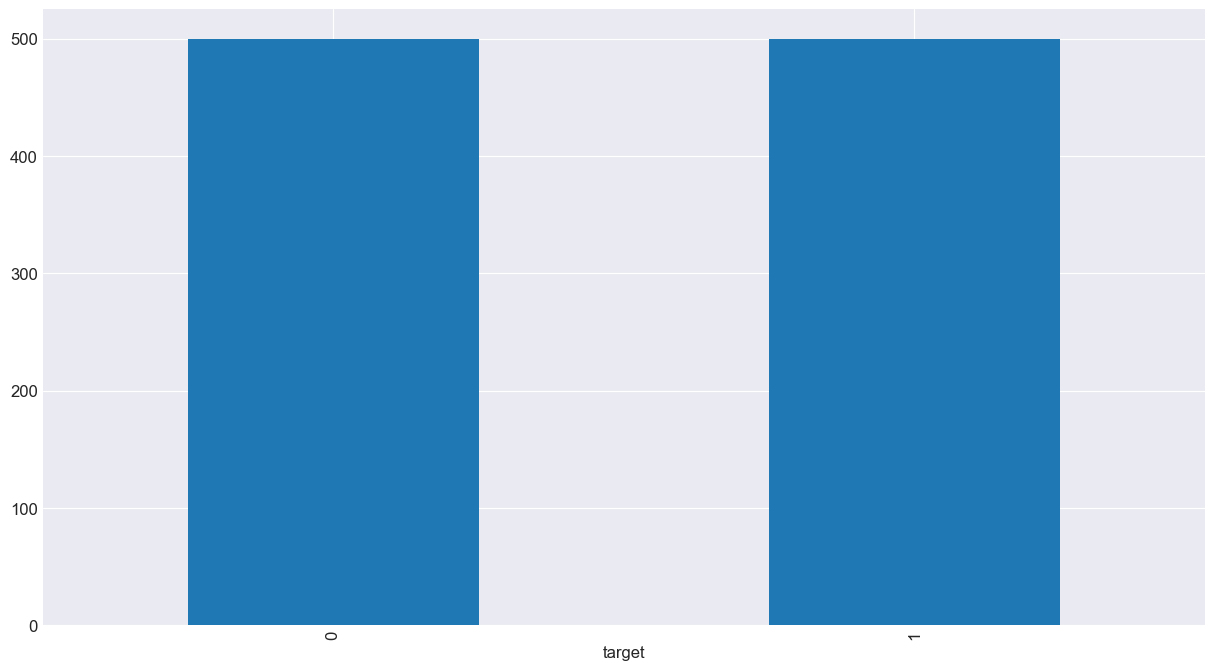

In [9]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

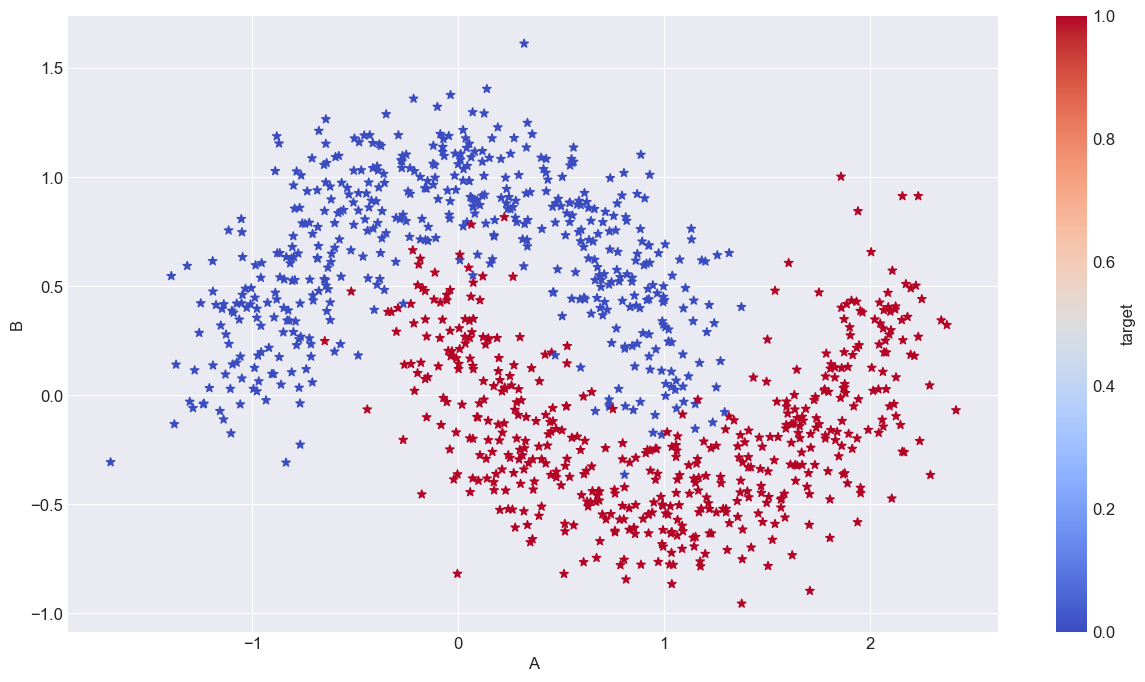

In [10]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

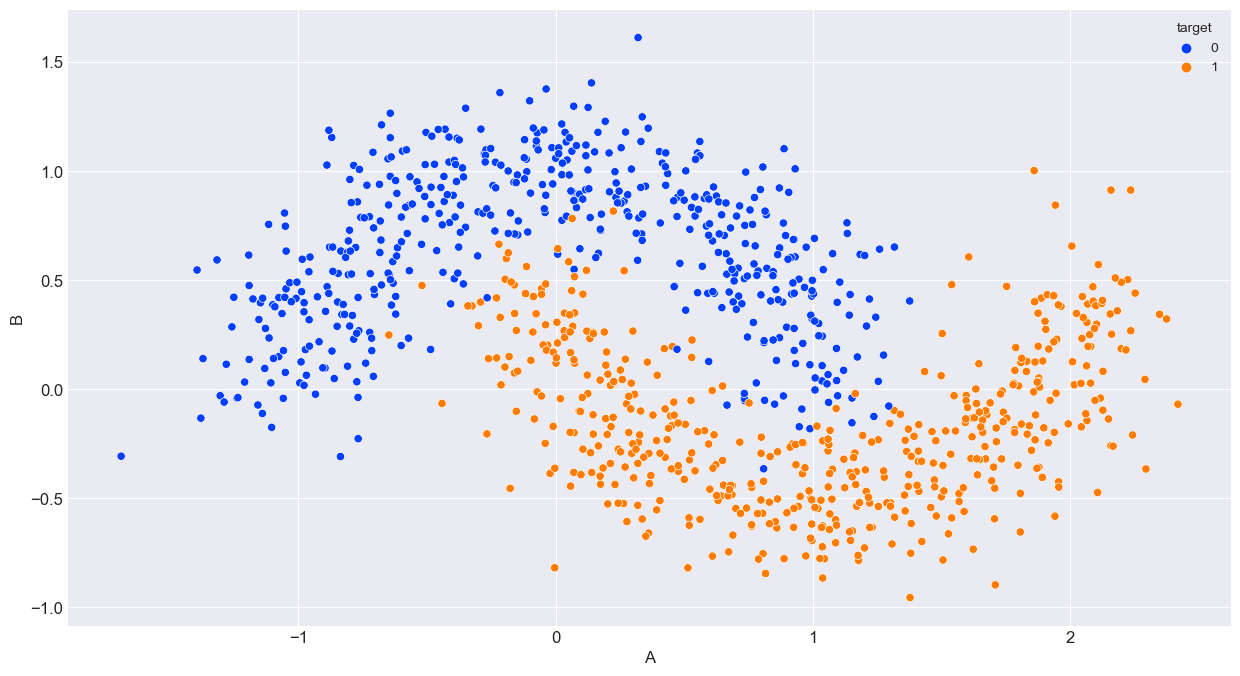

In [11]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

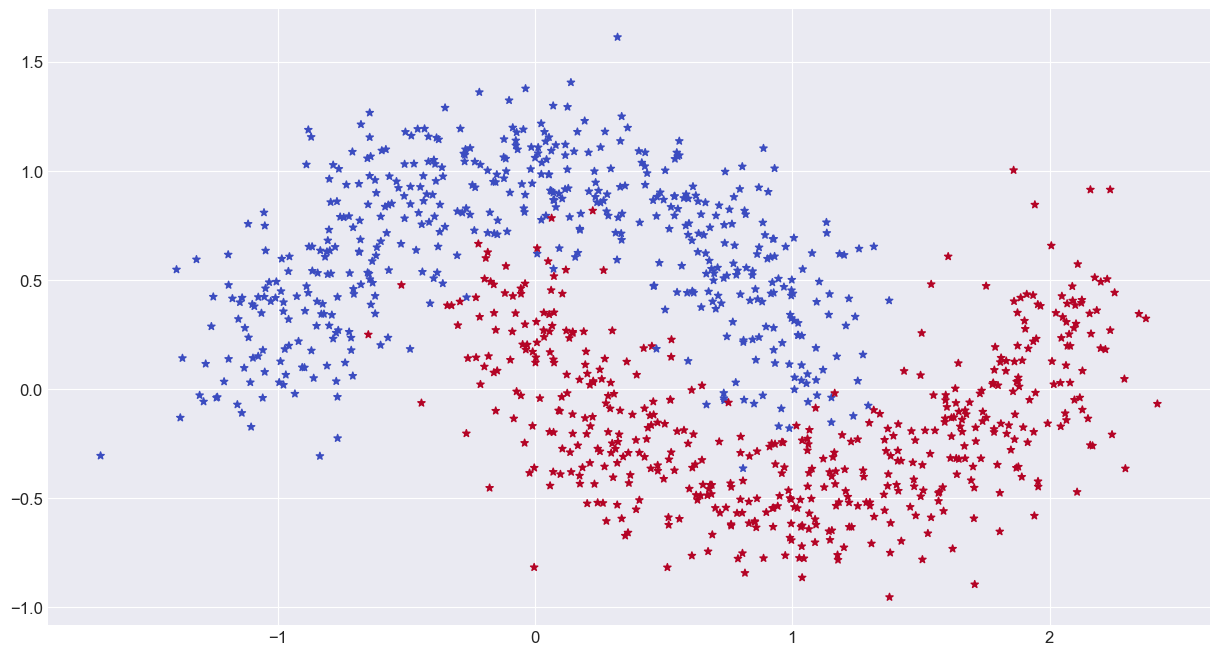

In [12]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [13]:
#plt.scatter?

In [14]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [15]:
data_test

array([[ 1.64736053e+00, -1.04936773e-01,  1.00000000e+00],
       [-5.57157270e-01,  8.48979322e-01,  0.00000000e+00],
       [ 1.15826488e+00, -3.13160503e-01,  1.00000000e+00],
       [-6.41910461e-01,  5.02392502e-01,  0.00000000e+00],
       [ 6.80605978e-01, -4.40831773e-01,  1.00000000e+00],
       [-7.47188958e-02,  1.13818507e+00,  0.00000000e+00],
       [ 8.27453572e-03,  6.44331166e-01,  1.00000000e+00],
       [ 1.06150138e-01, -2.74850288e-01,  1.00000000e+00],
       [ 1.12037561e+00, -3.20948283e-01,  1.00000000e+00],
       [-4.40351436e-01,  7.53554921e-01,  0.00000000e+00],
       [-8.26001350e-02, -1.36553707e-01,  1.00000000e+00],
       [-7.67745712e-01,  4.20561911e-01,  0.00000000e+00],
       [ 1.05906909e+00, -2.28709880e-01,  1.00000000e+00],
       [ 1.63719891e+00, -3.19029955e-01,  1.00000000e+00],
       [ 5.55305257e-01,  8.24514963e-01,  0.00000000e+00],
       [ 4.59058518e-01,  8.63972938e-01,  0.00000000e+00],
       [ 5.48718460e-02,  3.40939929e-01

In [16]:
data_train

array([[ 0.90633951,  0.90267624,  0.        ],
       [-1.11536828,  0.75579289,  0.        ],
       [ 1.88769158,  0.4175967 ,  1.        ],
       ...,
       [ 0.81249096, -0.05083979,  0.        ],
       [ 0.86329816,  0.61714755,  0.        ],
       [ 2.0966594 , -0.05107625,  1.        ]])

In [17]:
data_train.shape, data_test.shape

((900, 3), (100, 3))

In [18]:
type(data_train)

numpy.ndarray

In [19]:
y = pd.get_dummies(y).to_numpy() #Conveting to one-hot encoding
y

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [20]:
y.shape

(1000, 2)

In [21]:
X_train, X_test, y_train, y_test  =  train_test_split(X, y, stratify= y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [22]:
X_train

array([[ 1.09250812,  0.03964548],
       [ 1.34038135, -0.11491831],
       [-0.03900763,  0.29525095],
       ...,
       [ 0.32070311,  1.61207468],
       [-0.27040491,  1.09739536],
       [ 0.99647506, -0.69413084]])

In [23]:
X_test

array([[ 0.28416546, -0.03245601],
       [ 0.83577695,  0.40444099],
       [-0.76774571,  0.42056191],
       [ 0.35060743, -0.67383946],
       [ 0.2772646 , -0.60668728],
       [ 0.51440752, -0.81897254],
       [ 1.80672388, -0.47751782],
       [ 0.98513638, -0.46601521],
       [ 1.94091811, -0.58212819],
       [ 0.36265223, -0.29404275],
       [-0.64809084,  0.24836959],
       [ 1.03130662, -0.50879449],
       [-0.46216182,  0.63544104],
       [ 0.86329816,  0.61714755],
       [-0.30160375,  0.81321935],
       [-0.77300678,  0.25656079],
       [ 0.61687009,  0.43999205],
       [ 0.29597711, -0.29416439],
       [-0.64263562,  1.15296129],
       [ 1.94527292, -0.01836546],
       [-0.88819717,  0.47009179],
       [ 1.9171034 ,  0.18420051],
       [-0.95690251,  0.19756463],
       [ 0.92785941,  0.68703367],
       [ 2.06549771, -0.1437958 ],
       [ 0.12914397,  0.91900708],
       [ 1.91483018, -0.24584629],
       [ 1.43451789,  0.08120139],
       [-1.39362818,

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

shape of input is frozen i.e. same as number of features.
shape of output is also frozen i.e. same as number of outputs. 
In hidden layer you can add as many no of neurons you want.
bias seats on the top of each neuron.

In [25]:
#first activation function -> tanh
def fn_activ(z):
    return np.tanh(z)

#to change the range from -inf,+ing to -1,1 using tanh
def fn_activ_prime(a):
    return 1 - np.tanh(a)**2


In [26]:
#second activation function -> softmax
def fn_softmax(z):
    '''
    Args:
        z : a matrix of z values of shape
    returns :
        softmax values of z
    '''

    #calculating softmax function
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [27]:
sm = fn_softmax(np.asarray([[8,5,0], [-10, 0, 10]]))
sm.sum(axis=1, keepdims=True) #along axis is always one axis=1, keepdims=True

array([[1.],
       [1.]])

In [28]:
sm.sum(axis=1)

array([1., 1.])

In [29]:
sm.sum(axis=1, keepdims=True).shape

(2, 1)

In [30]:
#forward propagation 

def predict(model, X_p):
    
    W1 = model['W1']
    W2 = model['W2']
    W3 = model['W3']
    W4 = model['W4']
    W5 = model['W5']
    
    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']
    
    
       # forward propagation 
        # Layer 1 
    z1 = X_p.dot(W1) + b1  # Aggregation z = X.W + b
    a1 = fn_activ(z1)       # Activation a = g(z)

        ##################################################################################
    
        # Layer 2
    z2 = a1.dot(W2) + b2    # Aggregation z = X.W + b
    a2 = fn_activ(z2)       # Activation a = g(z)

        ##################################################################################
        
        # Layer 3
    z3 = a2.dot(W3) + b3    # Aggregation z = X.W + b
    a3 = fn_activ(z3)       # Activation a = g(z)

        ##################################################################################

        # Layer 4
    z4 = a3.dot(W4) + b4    # Aggregation z = X.W + b
    a4 = fn_activ(z4)       # Activation a = g(z)

        ##################################################################################
    
        # Layer 5  (Different activation function -> softmax)
    z5 = a4.dot(W5) + b5
    a5 = fn_softmax(z5) 

        #################################################################################

    return np.argmax(a5, axis=1) #pick index of class with highest probability # argmax gives us probability

In [31]:
#calculating loss as we are taking weights and bias random 

def calculate_loss(model, X_l, y_l):
    W1 = model['W1']
    W2 = model['W2']
    W3 = model['W3']
    W4 = model['W4']
    W5 = model['W5']
    
    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']

    m = X_l.shape[0]
    
  # forward propagation 
        # Layer 1 
    z1 = X_l.dot(W1) + b1  # Aggregation z = X.W + b
    a1 = fn_activ(z1)       # Activation a = g(z)

        ##################################################################################
    
        # Layer 2
    z2 = a1.dot(W2) + b2    # Aggregation z = X.W + b
    a2 = fn_activ(z2)       # Activation a = g(z)

        ##################################################################################
        
        # Layer 3
    z3 = a2.dot(W3) + b3    # Aggregation z = X.W + b
    a3 = fn_activ(z3)       # Activation a = g(z)

        ##################################################################################

        # Layer 4
    z4 = a3.dot(W4) + b4    # Aggregation z = X.W + b
    a4 = fn_activ(z4)       # Activation a = g(z)

        ##################################################################################
    
        # Layer 5  (Different activation function -> softmax)
    z5 = a4.dot(W5) + b5
    a5 = fn_softmax(z5) 

        #################################################################################

    
    data_loss = - ( y_l*np.log(a5) + ( 1-y_l ) * np.log(1-a5) ).sum()   #calculating losses along each sample
 
    return data_loss / m 

In [32]:
#loss_hist = {}

Multiple layers

Input Layer
Layer 1 - 5 - Tanh
Layer 2 - 5 - Tanh
Layer 3 - 4 - Tanh
Layer 4 - 3 - Tanh
Output Layer

In [33]:
param = {}
param['nn_dim'] = [X_train.shape[1], 5, 5, 4, 3] # Node nums
loss_hist = {}
param['nn_dim']

[2, 5, 5, 4, 3]

In [34]:
#we dont know the weights so building the model 

def build_model(param, X_tr, y_tr, nn_out, alpha=ALPHA, epochs=EPOCHS):
    '''
    Args:
        param : parameters of building the model
        X_tr : Training features
        y_tr : Training labels
        nn_hdim : number of nodes in the hidden layer
        nn_out : size of output
        nn_input_dim : no. of columns
    '''
    m = X_tr.shape[0]
    nn_output_dim = nn_out

    # Hidden Layers

    #Layer 1
    # size = 2, 5
    W1 = np.random.rand(param['nn_dim'][0], param['nn_dim'][1]) / np.sqrt(param['nn_dim'][0])

    # size = 5
    b1 = np.zeros((1, param['nn_dim'][1]), dtype = np.float32)

    ###################################################################################

    #Layer 2
    # size = 5, 5
    W2 = np.random.rand(param['nn_dim'][1], param['nn_dim'][2]) / np.sqrt(param['nn_dim'][1])

    # size = 5
    b2 = np.zeros((1, param['nn_dim'][2]), dtype = np.float32)

    ###################################################################################
    
    #Layer 3
    # size = 5, 4
    W3 = np.random.rand(param['nn_dim'][2], param['nn_dim'][3]) / np.sqrt(param['nn_dim'][2])

    # size = 5
    b3 = np.zeros((1, param['nn_dim'][3]), dtype = np.float32)

    ###################################################################################

    #Layer 4
    # size = 4, 3
    W4 = np.random.rand(param['nn_dim'][3], param['nn_dim'][4]) / np.sqrt(param['nn_dim'][3])

    # size = 3
    b4 = np.zeros((1, param['nn_dim'][4]), dtype = np.float32)

    ###################################################################################

    #Layer 5
    # size = 3, 2
    W5 = np.random.rand(param['nn_dim'][4], nn_output_dim) / np.sqrt(param['nn_dim'][4])

    # size = 2
    b5 = np.zeros((1, nn_output_dim), dtype = np.float32)

    ###################################################################################
    

    curr_loss = 0

    loss, epoch = [] , []

    for i  in range (0, epochs):

        
        # forward propagation 
        # Layer 1 
        z1 = X_tr.dot(W1) + b1  # Aggregation z = X.W + b
        a1 = fn_activ(z1)       # Activation a = g(z)

        ##################################################################################
    
        # Layer 2
        z2 = a1.dot(W2) + b2    # Aggregation z = X.W + b
        a2 = fn_activ(z2)       # Activation a = g(z)

        ##################################################################################
        
        # Layer 3
        z3 = a2.dot(W3) + b3    # Aggregation z = X.W + b
        a3 = fn_activ(z3)       # Activation a = g(z)

        ##################################################################################

        # Layer 4
        z4 = a3.dot(W4) + b4    # Aggregation z = X.W + b
        a4 = fn_activ(z4)       # Activation a = g(z)

        ##################################################################################
    
        # Layer 5  (Different activation function -> softmax)
        z5 = a4.dot(W5) + b5
        a5 = fn_softmax(z5) 

        #################################################################################



        #back propogation

        #Layer 5
        assert(a5.shape== y_tr.shape), f'check y {a5.shape}/{y_tr.shape}'
        dz5 = a5 - y_tr #remember dimention of a2 and y to be same

        dW5 = (a4.T).dot(dz5)
        assert (W5.shape == dW5.shape), f'check W2 {W5.shape}/{dW5.shape}'

        db5 = np.sum(dz5, axis = 0, keepdims=True)
        assert (b5.shape == db5.shape), f'check b5 {b5.shape}/{db5.shape}'

        da4 = dz5.dot(W5.T)  
        assert (a4.shape == da4.shape), f'check a4 {a4.shape}/{da4.shape}'

        ##############################################################################
        
        # Layer 4
        
        dz4 = da4 * fn_activ_prime(z4)  
        assert (z4.shape == dz4.shape), f'check z4 {z4.shape}/{dz4.shape}'

        dW4 = (a3.T).dot(dz4)   
        assert (W4.shape == dW4.shape), f'check W4 {W4.shape}/{dW4.shape}'

        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert (b4.shape == db4.shape), f'check b4 {b4.shape}/{db4.shape}'

        da3 = dz4.dot(W4.T)  
        assert (a3.shape == da3.shape), f'check a3 {a3.shape}/{da3.shape}'

        ################################################################################

        # Layer 3
        
        dz3 = da3 * fn_activ_prime(z3)  
        assert (z3.shape == dz3.shape), f'check z3 {z3.shape}/{dz3.shape}'

        dW3 = (a2.T).dot(dz3)    # dw = a.dz
        assert (W3.shape == dW3.shape), f'check W3 {W3.shape}/{dW3.shape}'

        db3 = np.sum(dz3, axis=0, keepdims=True)
        assert (b3.shape == db3.shape), f'check b3 {b3.shape}/{db3.shape}'

        da2 = dz3.dot(W3.T)  # da = W.dz
        assert (a2.shape == da2.shape), f'check a2 {a2.shape}/{da2.shape}'

        ################################################################################

        # Layer 2
        
        dz2 = da2 * fn_activ_prime(z2)  
        assert (z2.shape == dz2.shape), f'check z2 {z2.shape}/{dz2.shape}'

        dW2 = (a1.T).dot(dz2)   
        assert (W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert (b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)  
        assert (a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'

        ################################################################################

        # Layer 1
        
        dz1 = da1 * fn_activ_prime(z1)  
        assert (z1.shape == dz1.shape), f'check z1 {z1.shape}/{dz1.shape}'

        dW1 = (X_tr.T).dot(dz1)    # dw = a.dz
        assert (W1.shape == dW1.shape), f'check W1 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert (b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'


        

        

        #Gradient Update
        W1 += - alpha * dW1 / m  
        b1 += - alpha * db1 / m 
        W2 += - alpha * dW2 / m 
        b2 += - alpha * db2 / m 
        W3 += - alpha * dW3 / m  
        b3 += - alpha * db3 / m 
        W4 += - alpha * dW4 / m 
        b4 += - alpha * db4 / m
        W5 += - alpha * dW5 / m 
        b5 += - alpha * db5 / m

        #saving weights and biases in dict to use in other functions
        model = { 'W1' : W1, 'b1' : b1,
                  'W2' : W2, 'b2' : b2,
                  'W3' : W3, 'b3' : b3,
                  'W4' : W4, 'b4' : b4,
                  'W5' : W5, 'b5' : b5
                }

    
        curr_loss = calculate_loss(model, X_tr, y_tr)
        loss.append(curr_loss)
        epoch.append(i)

        #printing current loss calculated
        if i % 100 == 0:
            print(f'After epoch: {i:3d}; loss: {curr_loss: .5f}')
        
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    
    return model

In [35]:
nn_out_dim = 2
model = build_model(param, X_train, y_train, nn_out_dim)
model

After epoch:   0; loss:  1.37874
After epoch: 100; loss:  1.19052
After epoch: 200; loss:  0.68124
After epoch: 300; loss:  0.64049
After epoch: 400; loss:  0.62980
After epoch: 500; loss:  0.61682
After epoch: 600; loss:  0.56623
After epoch: 700; loss:  0.29237
After epoch: 800; loss:  0.32822
After epoch: 900; loss:  0.20350
After epoch: 1000; loss:  0.18469
After epoch: 1100; loss:  0.17461
After epoch: 1200; loss:  0.16862
After epoch: 1300; loss:  0.16478
After epoch: 1400; loss:  0.16213
After epoch: 1500; loss:  0.16022
After epoch: 1600; loss:  0.15879
After epoch: 1700; loss:  0.15768
After epoch: 1800; loss:  0.15681
After epoch: 1900; loss:  0.15611
After epoch: 2000; loss:  0.15554
After epoch: 2100; loss:  0.15507
After epoch: 2200; loss:  0.15468
After epoch: 2300; loss:  0.15435
After epoch: 2400; loss:  0.15406
After epoch: 2500; loss:  0.15381
After epoch: 2600; loss:  0.15359
After epoch: 2700; loss:  0.15340
After epoch: 2800; loss:  0.15322
After epoch: 2900; loss:

{'W1': array([[ 0.93743252,  2.173056  ,  0.70663317,  0.79874572,  0.75942517],
        [-0.42566944,  0.23103029, -0.3166399 , -0.37170033, -0.34608037]]),
 'b1': array([[ 0.42710355, -1.0555228 , -0.31314877, -0.6842566 , -0.5849731 ]],
       dtype=float32),
 'W2': array([[ 0.53325343,  0.14431369,  0.44682321,  0.75750347,  0.33705751],
        [-1.30163348, -0.43612504, -0.85792447, -1.13377302, -0.68590423],
        [ 0.55984351,  0.07646007,  0.27883374,  0.42566438,  0.40080314],
        [ 0.65122654,  0.39421642,  0.33071866,  0.4274871 ,  0.12574553],
        [ 0.47064923,  0.31669821,  0.40517271,  0.38250849,  0.32544018]]),
 'b2': array([[-0.10335376, -0.00163679, -0.02167086, -0.01155391,  0.05354522]],
       dtype=float32),
 'W3': array([[0.5280794 , 0.59329198, 0.44652655, 0.60210198],
        [0.21188367, 0.15935263, 0.2265052 , 0.03480251],
        [0.26869802, 0.2705445 , 0.29846947, 0.48922847],
        [0.44135718, 0.46576602, 0.548691  , 0.52463418],
        [0.

In [36]:
model['W1'].shape    #weight size matiching (2,4)

(2, 5)

<Axes: xlabel='epoch'>

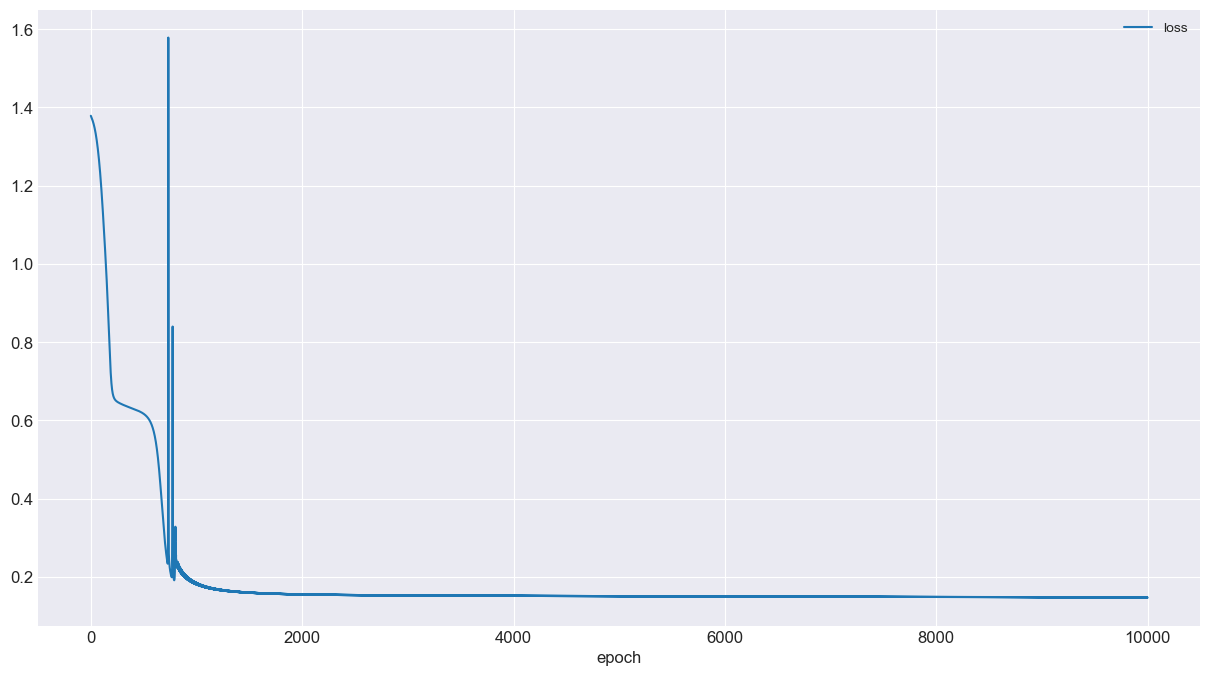

In [37]:
pd.DataFrame(loss_hist).plot(x='epoch')  #loss curve 

In [38]:
np.random.rand(data_train.shape[1]) #w0, w1, w2
#Z = x*w + b
#Z = weights[0]

array([0.28506059, 0.65956042, 0.97212026])

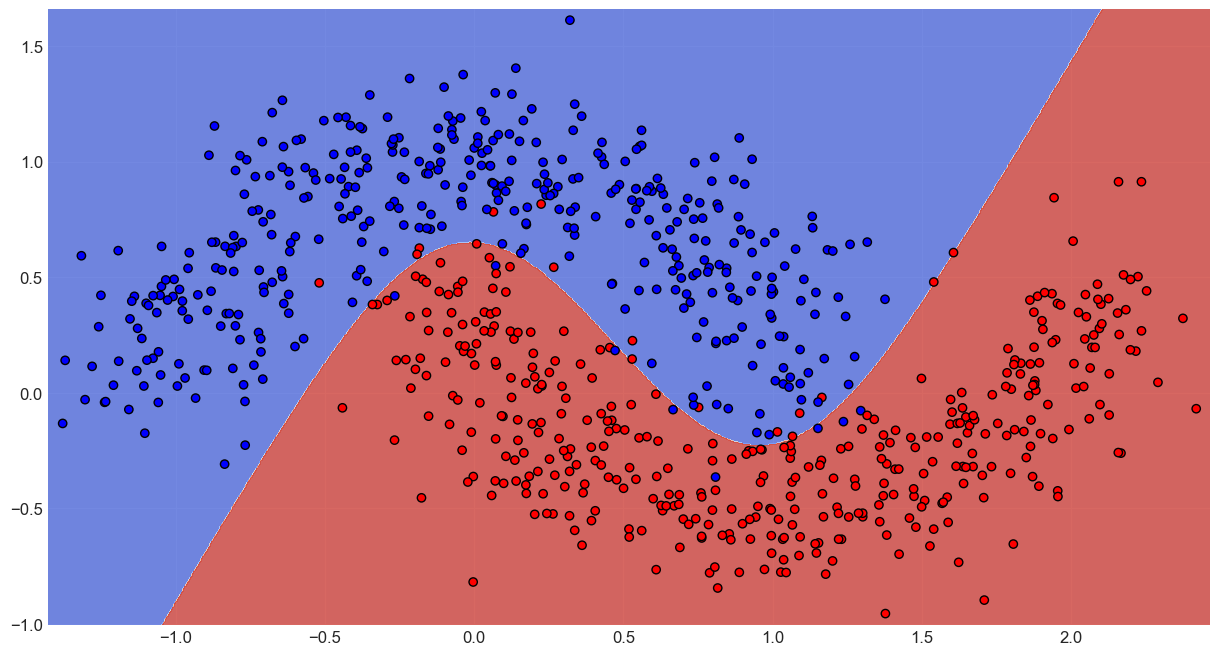

In [39]:
X = X_train
fig, ax = plt.subplots() #instantiation of plt object
dm = 0.005  #spacing of the grid 
x_min, x_max = X[:,0].min() - 0.05 ,  X[:,0].max() + 0.05
y_min, y_max = X[:,1].min() - 0.05 ,  X[:,1].max() + 0.05

xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                     np.arange(y_min, y_max, dm))  #generating a mesh

XX = np.c_[xx.ravel(), yy.ravel()]  #prepare feature data

#prediction = predict(model, XX)
#y_pred = prediction.argmax(axis=1)
y_pred = predict(model, XX)

Z = np.array(y_pred).reshape(xx.shape)


#ploting decision boundary
ax.contourf(xx, yy, Z, cmap=CMAP, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c= y_train.argmax(axis=1) , edgecolors='k', cmap=plt.cm.bwr)

In [40]:
xx.shape

(534, 780)

In [41]:
yy.shape

(534, 780)

In [44]:
# Accuracy score for test data
y_pred = predict(model, X_test)
print('Accuracy for test data : ', accuracy_score(y_test.argmax(axis=1), y_pred) )

Accuracy for test data :  0.98


In [54]:
#Confusion matrix for test data
y_pred = predict(model, X_test)
cmt = confusion_matrix(y_test.argmax(axis=1), y_pred)
print('Confusion matrix for test data : \n', cmt)

Confusion matrix for test data : 
 [[99  1]
 [ 3 97]]


In [48]:
# Accuracy score for train data
y_pred = predict(model, X_train)
print('Accuracy for test data : ', accuracy_score(y_train.argmax(axis=1), y_pred)) 

Accuracy for test data :  0.97125


In [53]:
# Confusion matrix for test data
y_pred = predict(model, X_train)
cm = confusion_matrix(y_train.argmax(axis=1), y_pred)
print('Confusion matrix for test data : \n', cm)

Confusion matrix for test data : 
 [[392   8]
 [ 15 385]]


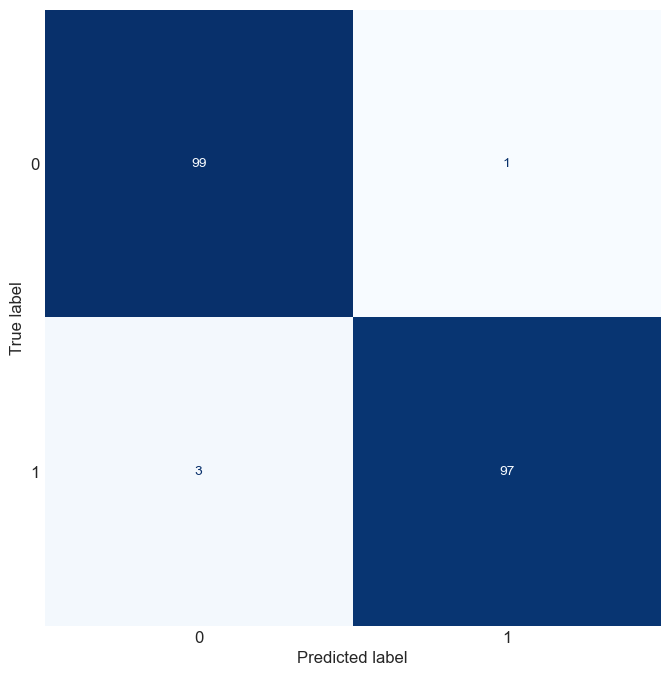

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmt , display_labels=[0,1])
fig, ax = plt.subplots(figure=(6,6))
disp.plot(ax = ax, cmap='Blues', colorbar=False);
ax.grid(False);